In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r'/content/judge-1377884607_tweet_product_company.csv',encoding = "ISO-8859-1")

### Data Preprocessing

In [3]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

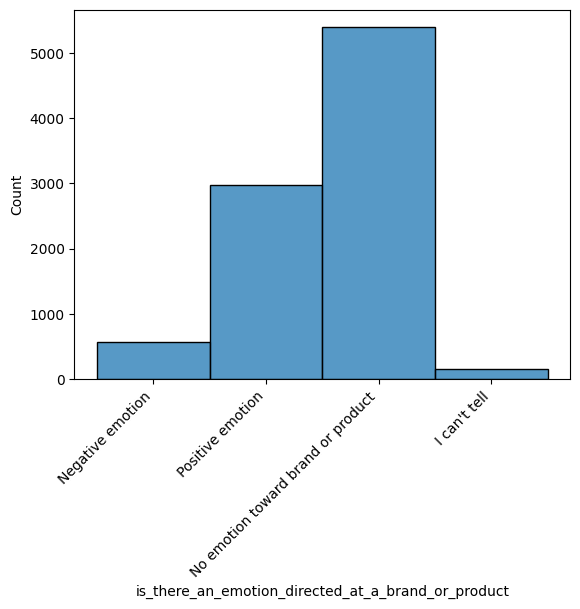

In [5]:
ax=sns.histplot(data=df['is_there_an_emotion_directed_at_a_brand_or_product'])
plt.xticks(rotation=45, ha='right')
plt.show()

In [6]:
df.shape

(9093, 3)

In [7]:
df=df.drop(['emotion_in_tweet_is_directed_at'],axis=1)

In [8]:
df.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'label'}, inplace=True)
df.head()

,tweet_text,label
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [9]:
df['label'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [10]:
df['label'].value_counts()

label
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  9092 non-null   object
 1   label       9093 non-null   object
dtypes: object(2)
memory usage: 142.2+ KB


In [12]:
df=df.dropna()

In [13]:
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
word_lem=WordNetLemmatizer()
sw = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
def lemm(text):
  lemm_text=[word_lem.lemmatize(word) for word in text]
  return lemm_text

In [15]:
url_pattern = r'https?://\S+|www\.\S+'

In [16]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [17]:
def cor_proces(content):
  cleaned_con = re.sub(url_pattern, '', content)
  non_pun=re.sub('[^a-zA-Z0-1]',' ',cleaned_con)
  doc = nlp(non_pun)

  # Define brand-related pattern

  # Filter tokens based on entity type and brand pattern
  brand_pattern = re.compile(r'\b(?:iphone|apple|sony|experia|samsung|amazon|google)\b', flags=re.IGNORECASE)

  # Filter tokens based on entity type and brand pattern
  filtered_tokens = [token.text for token in doc if
                    (token.ent_type_ == 'ORG' or brand_pattern.search(token.text.lower())) and
                    token.text.lower() not in ['iphone', 'apple', 'sony', 'experia', 'samsung', 'amazon', 'google']]

  # Join filtered tokens to form the processed text
  new_con = ' '.join([token.text for token in doc if token.text not in filtered_tokens])

  # Lowercase, tokenize, remove stopwords, and lemmatize
  lower_con = new_con.lower()
  stemmed_con = lower_con.split()
  sw_con = [i for i in stemmed_con if i not in sw]
  word_lem = WordNetLemmatizer()
  lemm_con = [word_lem.lemmatize(word) for word in sw_con]
  new_con = ' '.join(lemm_con)

  return new_con

In [18]:
test_con=df['tweet_text'][8]
test_con

'Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB'

In [19]:
 cor_proces(test_con)

'beautifully smart simple idea rt madebymany thenextweb wrote hollergram app sxsw'

In [20]:
df['new_content']=df['tweet_text'].apply(cor_proces)

In [21]:
df.head(4)

,tweet_text,label,new_content
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,wesley g iphone hr tweeting rise austin dead n...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,jessedee know fludapp awesome ipad iphone app ...
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,swonderlin wait also sale
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,sxsw hope year festival crashy year iphone app...


In [22]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

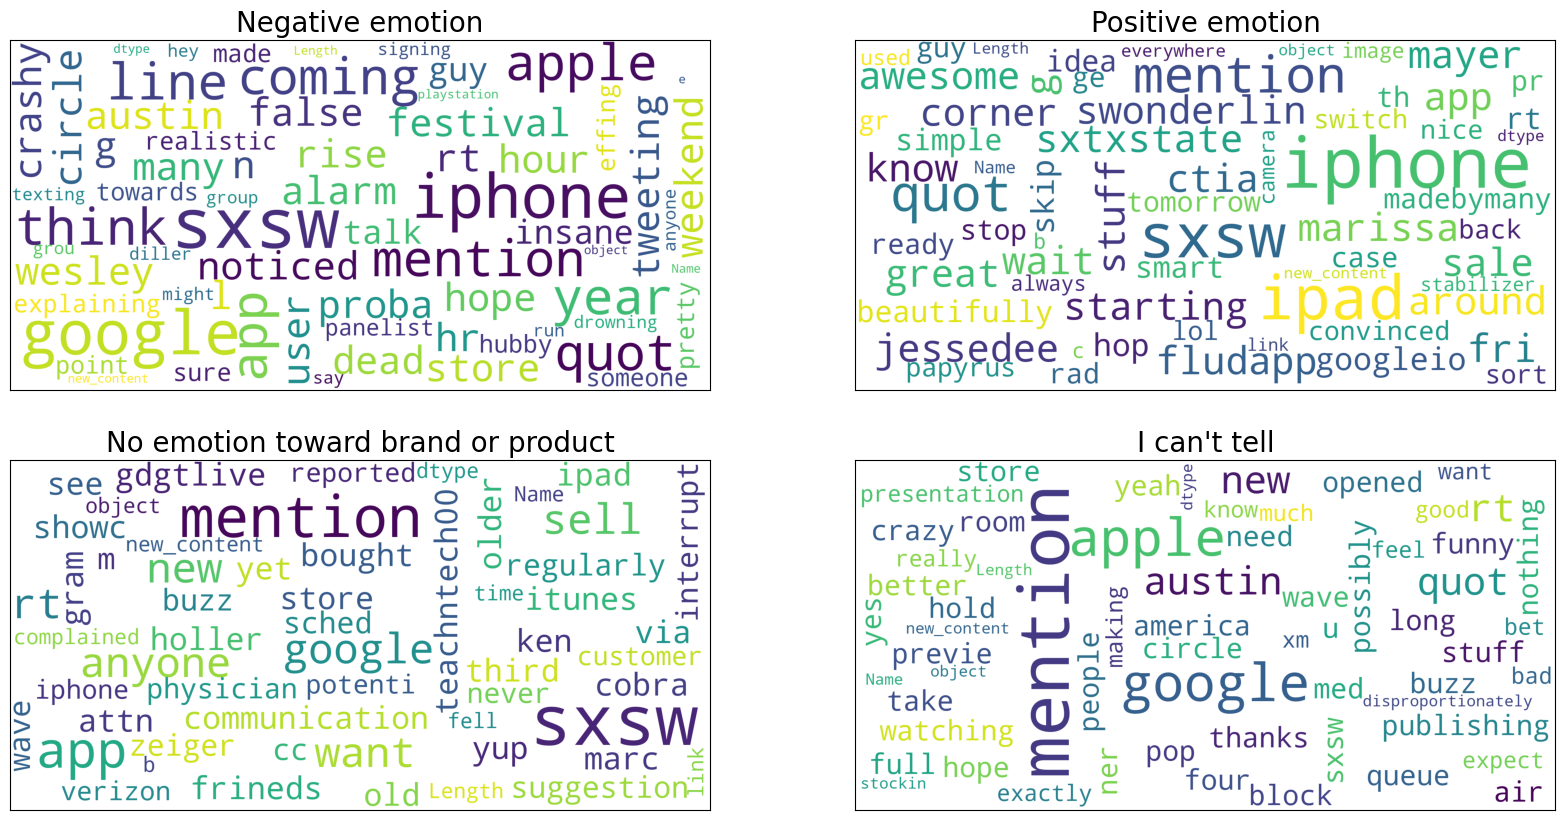

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(figsize=(20,10))

for index, col in enumerate(df['label'].unique()):
    plt.subplot(2,2, index+1)
    df2 = df[df['label']==col]
    data = df2['new_content']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=20)

plt.show()
plt.tight_layout()

 Balancing the Data of each clasess

In [24]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
df[(df['label'] == 0)].head(3)

,tweet_text,label,new_content


In [26]:
sia.polarity_scores(df['new_content'][16])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [27]:
df[(df['label'] == 2)].head(3)

,tweet_text,label,new_content


In [28]:
sia.polarity_scores(df['new_content'][90])

{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.4404}

In [29]:
sia.polarity_scores(df['new_content'][102])

{'neg': 0.116, 'neu': 0.684, 'pos': 0.2, 'compound': 0.3818}

In [30]:
pol_scores=[]
for comment in df['new_content']:
  compound=sia.polarity_scores(comment)['compound']
  pol_scores.append(compound)
print("maximum compound score:",max(pol_scores),'\n',"minimum compound score:",min(pol_scores))

maximum compound score: 0.9565 
 minimum compound score: -0.9337


In [31]:
value_counts = df['label'].value_counts()

count_group = value_counts[0]-value_counts[1]

In [32]:
rows_to_drop = np.random.choice(df[df['label'] == 'No emotion toward brand or product'].index, size=count_group, replace=False)
df_equalized = df.drop(rows_to_drop)

In [33]:
import random

# Function to generate a new sentence with a random number of words
def generate_new_sentence(tokenized_words, min_words, max_words, threshold1, threshold2, pos_score=None):
    while True:
        num_words = random.randint(min_words, max_words)
        selected_words = random.sample(tokenized_words, num_words)
        new_sentence = ' '.join(selected_words)
        polarity_score = sia.polarity_scores(new_sentence)['compound']
        if threshold1 <= polarity_score <= threshold2:
            if pos_score is not None:
                current_pos_score = sia.polarity_scores(new_sentence)['pos']
                if current_pos_score == pos_score:
                    return new_sentence
            else:
                return new_sentence

In [34]:
Z =df['new_content'].loc[df['label']=='Negative emotion']

tokenized_words = [word for sentence in Z for word in sentence.split()]

min_words = min(len(sentence.split()) for sentence in Z)
max_words = max(len(sentence.split()) for sentence in Z)

new_sentences_negative = [generate_new_sentence(tokenized_words, min_words, max_words,-1,-0.4,0) for _ in range(2978)]


In [35]:
balanced_data = {'new_content': [], 'label': []}

for item in new_sentences_negative:
    balanced_data['new_content'].append(item)
    balanced_data['label'].append('Negative emotion')

balanced_df_1 = pd.DataFrame(balanced_data)

balanced_df_1.head(4)

,new_content,label
0,burn sxsw circle cont first circle sxsw house ...,Negative emotion
1,link sooo link suck hack sxsw g tablet,Negative emotion
2,graph sun problem button apple say,Negative emotion
3,un seriously quot j iphone sxsw quot unpack of...,Negative emotion


In [36]:
W =df['new_content'].loc[df['label']=="I can't tell"]

tokenized_words = [word for sentence in W for word in sentence.split()]

min_words = min(len(sentence.split()) for sentence in W)
max_words = max(len(sentence.split()) for sentence in W)

new_sentences_NRS = [generate_new_sentence(tokenized_words, min_words, max_words,-1,1) for _ in range(2978)]

In [37]:
balanced_data_NRS = {'new_content': [], 'label': []}

for item in new_sentences_NRS:
    balanced_data_NRS['new_content'].append(item)
    balanced_data_NRS['label'].append("I can't tell")

balanced_df_2 = pd.DataFrame(balanced_data_NRS)

balanced_df_2.head(4)

,new_content,label
0,winelibrary thing offer sxsw iphone,I can't tell
1,via crop app company boomer valuation profile ...,I can't tell
2,footage quot talk w cheering tweetdeck balance...,I can't tell
3,apple google sxsw profile eating pop bad googl...,I can't tell


In [38]:
df1=df_equalized[['new_content','label']]
df1.head(4)

,new_content,label
0,wesley g iphone hr tweeting rise austin dead n...,Negative emotion
1,jessedee know fludapp awesome ipad iphone app ...,Positive emotion
2,swonderlin wait also sale,Positive emotion
3,sxsw hope year festival crashy year iphone app...,Negative emotion


In [39]:
concated_df=pd.concat([df1,balanced_df_1,balanced_df_2],ignore_index=True)

In [40]:
df_shuffled = concated_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [41]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df_shuffled['label'] = label_encoder.fit_transform(df_shuffled['label'])

In [42]:
df_shuffled.tail()

,new_content,label
12633,iangogame linking pack quitted call referentia...,0
12634,apple open pop store wannabe hipster feel home...,3
12635,mention panel hashtag mom yourmom sxsw winning,2
12636,exploring world combine google w location indi...,3
12637,wesley b selfish come concert app phone featur...,1


In [43]:
from keras.preprocessing import text
from keras.utils import pad_sequences

In [44]:
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(list(df_shuffled['new_content']))
tokenized_texts = tokenizer.texts_to_sequences(df_shuffled['new_content'])
X = pad_sequences(tokenized_texts, maxlen=100)

In [45]:
X[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    2,    1,    3,  319,   21,  129,  494,  217,   51,    3,
       1513], dtype=int32)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df_shuffled['label'], test_size=0.2)

In [47]:
X_train

array([[   0,    0,    0, ...,  469,    2,    4],
       [   0,    0,    0, ...,   86,  308,   37],
       [   0,    0,    0, ...,  132,  323, 2558],
       ...,
       [   0,    0,    0, ...,  130,  316,  919],
       [   0,    0,    0, ...,  476,  129,    1],
       [   0,    0,    0, ...,  855,  114,  829]], dtype=int32)

In [52]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train, num_classes=4)

### Model bulding and Training

In [53]:
from keras.layers import Dense,LSTM, Embedding
from keras.models import Sequential

In [54]:
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, 128, input_length=100))
model.add(LSTM(20,return_sequences=True))
model.add(LSTM(30))
model.add(Dense(30,activation='relu'))
model.add(Dense(4, activation='softmax'))

In [55]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          904960    
                                                                 
 lstm_2 (LSTM)               (None, 100, 20)           11920     
                                                                 
 lstm_3 (LSTM)               (None, 30)                6120      
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 4)                 124       
                                                                 
Total params: 924054 (3.52 MB)
Trainable params: 924054 (3.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
model.fit(X_train, y_train_one_hot, epochs=2,validation_split=0.1)

Epoch 1/2
285/285 [==============================] - 37s 111ms/step - loss: 0.8827 - accuracy: 0.5904 - val_loss: 0.5772 - val_accuracy: 0.7181
Epoch 2/2
285/285 [==============================] - 30s 105ms/step - loss: 0.4665 - accuracy: 0.7828 - val_loss: 0.5183 - val_accuracy: 0.7537


### Testing

In [58]:
y_test_one_hot = to_categorical(y_test, num_classes=4)
loss, accuracy = model.evaluate(X_test, y_test_one_hot)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

79/79 [==============================] - 4s 51ms/step - loss: 0.5151 - accuracy: 0.7488
Test Loss: 0.5150512456893921
Test Accuracy: 0.748813271522522


In [62]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix , classification_report

predictions = model.predict(X_test)

79/79 [==============================] - 2s 26ms/step


In [63]:
predicted_labels = np.argmax(predictions, axis=1)
print(accuracy_score(y_test, predicted_labels))

0.7488132911392406


In [64]:
print("Classification Report: \n", classification_report(y_test, predicted_labels))


Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       627
           1       0.95      0.92      0.93       726
           2       0.50      0.43      0.46       580
           3       0.58      0.68      0.62       595

    accuracy                           0.75      2528
   macro avg       0.74      0.74      0.73      2528
weighted avg       0.75      0.75      0.75      2528



In [78]:
label_to_value={label: value for label, value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}


In [65]:
test1="I brought an iPad and it was great"
test1 = tokenizer.texts_to_sequences([test1])
test1 = pad_sequences(test1, maxlen=100)

In [69]:
test_pred=model.predict(test1)

1/1 [==============================] - 0s 91ms/step


In [79]:
for label, value in label_to_value.items():
  if value == np.argmax(test_pred, axis=1)[0]:
    print(label)

Positive emotion


In [80]:
test2="I brought an iPad and it felt like horrible"
test2 = tokenizer.texts_to_sequences([test2])
test2 = pad_sequences(test2, maxlen=100)
test2_pred=model.predict(test2)
for label, value in label_to_value.items():
  if value == np.argmax(test2_pred, axis=1)[0]:
    print(label)

1/1 [==============================] - 0s 59ms/step
Negative emotion
